In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")
data = data.copy()
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
data.shape

(13611, 17)

In [5]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

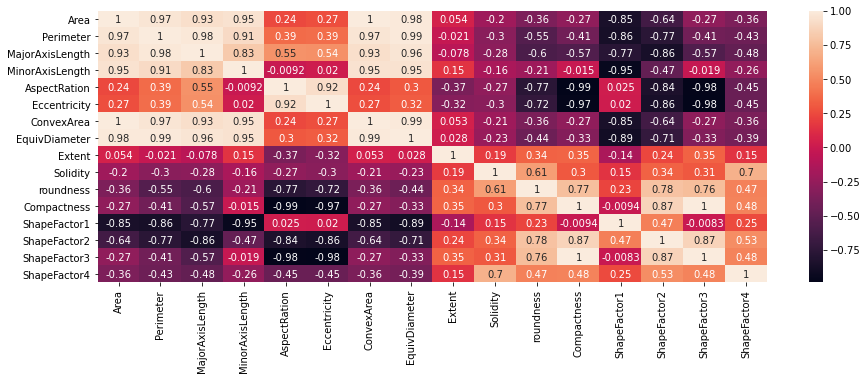

In [7]:
corr = data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr , annot=True);

In [8]:
num_cols=["Area","Perimeter","Major" ,"AxisLength","MinorAxisLength","AspectRation","Eccentricity","ConvexArea","EquivDiameter",
           "Extent","Solidity","roundness","Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"]
data_cols= ['Class']

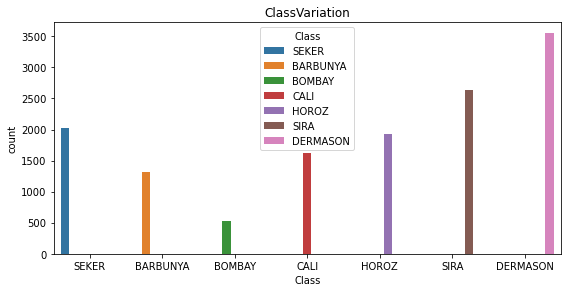

In [9]:
plt.figure(figsize= (20,40))

i=1
for col in data_cols:
    plt.subplot(8,2,i)
    sns.countplot(x= 'Class', hue=col, data=data)
    plt.title(col + 'Variation')
    i=i+1

In [10]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:title={'center':' Class'}, ylabel='Class'>

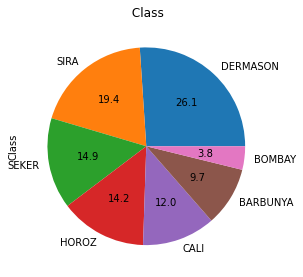

In [11]:
plt.figure(1)
plt.subplot(221)
data['Class'].value_counts().plot.pie(title=' Class',figsize=(20,10),autopct="%1.1f")

In [12]:
for column in data.columns[0:-1]:
    for spec in data["Class"].unique():
        selected_spec = data[data["Class"]==spec]
        selected_column = selected_spec[column] 
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3 - q1
        
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)
        
        print(column , spec  , " | min=" , minimum , "max" , maximum)
        
        max_index = data[(data["Class"]==spec) & (data[column] > maximum)].index
        print(max_index)
        min_index = data[(data["Class"]==spec) & (data[column] > minimum)].index
        print(min_index)
        
        data.drop(index = max_index)
        data.drop(index = min_index)

Area SEKER  | min= 26970.0 max 52138.0
Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
            2023, 2024, 2025, 2026],
           dtype='int64')
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
           dtype='int64', length=2027)
Area BARBUNYA  | min= 42867.75 max 96369.75
Int64Index([3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348], dtype='int64')
Int64Index([2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039,
            ...
            3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348],
           dtype='int64', length=1319)
Area BOMBAY  | min= 111879.625 max 231430.625
Int64Index([3864, 3865, 3866, 3867, 3868, 3869, 3870], dtype='int64')
Int64Index([3349, 3350

AspectRation SEKER  | min= 1.0485950363470364 max 1.43039090492659
Int64Index([ 666, 1035, 1303, 1338, 1388, 1402, 1421, 1429, 1447, 1472, 1502,
            1537, 1546, 1555, 1584, 1597, 1598, 1601, 1625, 1630, 1693, 1699,
            1706, 1709, 1738, 1758, 1791, 1798, 1812, 1836, 1838, 1844, 1861,
            1866, 1896, 1904, 1910, 1919, 1923, 1941, 1959, 1961, 1969, 1972,
            1983, 1990, 1999, 2001, 2007, 2008, 2009, 2011, 2013, 2016, 2017,
            2019, 2024],
           dtype='int64')
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
           dtype='int64', length=2023)
AspectRation BARBUNYA  | min= 1.2063268166588585 max 1.8839110149083602
Int64Index([2295, 2345, 2542, 2646, 2813, 2913, 3335], dtype='int64')
Int64Index([2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            ...
            3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 33

Int64Index([], dtype='int64')
Int64Index([10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072, 10073,
            10074,
            ...
            13601, 13602, 13603, 13604, 13605, 13606, 13607, 13608, 13609,
            13610],
           dtype='int64', length=3546)
Extent SEKER  | min= 0.722775263826144 max 0.8219700932022951
Int64Index([368, 1949], dtype='int64')
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
           dtype='int64', length=1998)
Extent BARBUNYA  | min= 0.617223408934784 max 0.8806672744123746
Int64Index([], dtype='int64')
Int64Index([2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            ...
            3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348],
           dtype='int64', length=1322)
Extent BOMBAY  | min= 0.680614939624671 max 0.8786996671333112
Int64Index([], dtype='int64')
Int64Index([3349, 3350, 3351, 3352, 3

ShapeFactor1 SEKER  | min= 0.005412533706289267 max 0.007272572348992593
Int64Index([0, 24, 42, 271], dtype='int64')
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2011, 2012, 2013, 2016, 2017, 2019, 2020, 2022, 2023, 2024],
           dtype='int64', length=2014)
ShapeFactor1 BARBUNYA  | min= 0.004208734426301332 max 0.006466398680528048
Int64Index([2027, 2028, 2030, 2032, 2034, 2035, 2036, 2037, 2039, 2045, 2053,
            2059, 2063, 2109],
           dtype='int64')
Int64Index([2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            ...
            3337, 3338, 3339, 3340, 3342, 3343, 3344, 3345, 3346, 3347],
           dtype='int64', length=1320)
ShapeFactor1 BOMBAY  | min= 0.0028597861097836345 max 0.004036936761504581
Int64Index([], dtype='int64')
Int64Index([3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358,
            ...
            3860, 3861, 3862, 3864, 3865, 3866, 3867, 3868, 3869, 3870],
      

ShapeFactor4 SEKER  | min= 0.9966844220411326 max 1.0004120694225433
Int64Index([], dtype='int64')
Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            2014, 2015, 2016, 2018, 2019, 2021, 2022, 2024, 2025, 2026],
           dtype='int64', length=1929)
ShapeFactor4 BARBUNYA  | min= 0.9904537683079637 max 1.0017385002117682
Int64Index([], dtype='int64')
Int64Index([2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            ...
            3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348],
           dtype='int64', length=1268)
ShapeFactor4 BOMBAY  | min= 0.9817792469090054 max 1.0030813512813481
Int64Index([], dtype='int64')
Int64Index([3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358,
            ...
            3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869],
           dtype='int64', length=502)
ShapeFactor4 CALI  | min= 0.9798796826162441 max 1.0020450734157114
Int64Index([], dtype='int64')
In

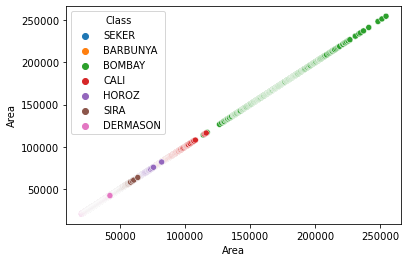

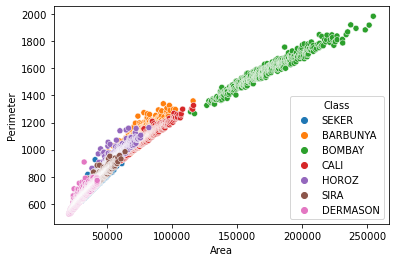

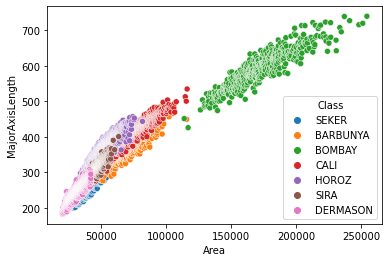

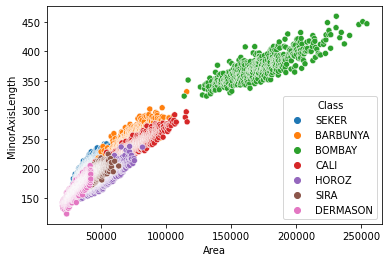

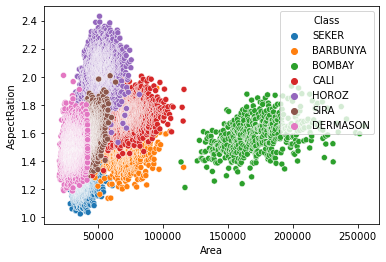

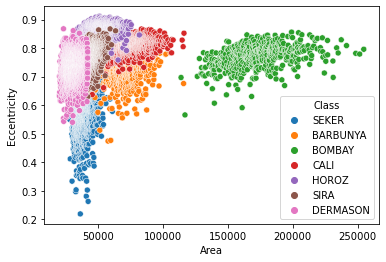

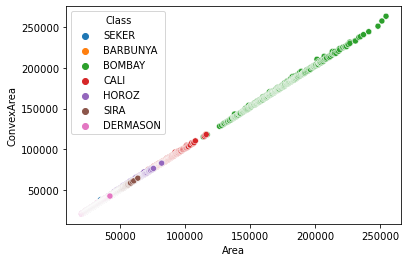

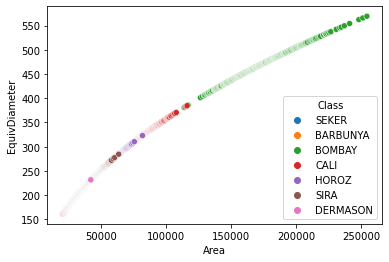

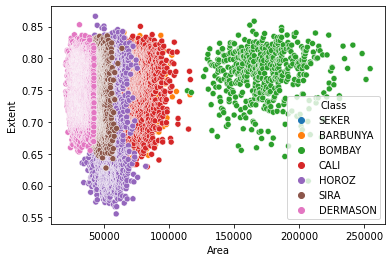

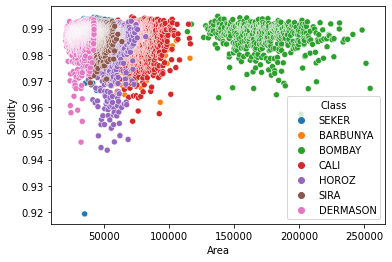

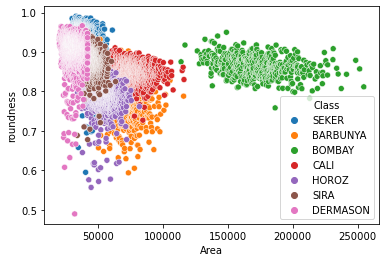

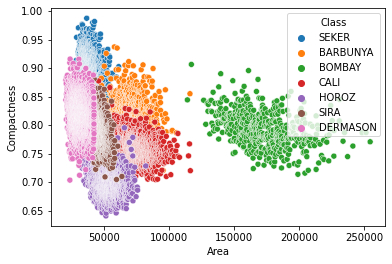

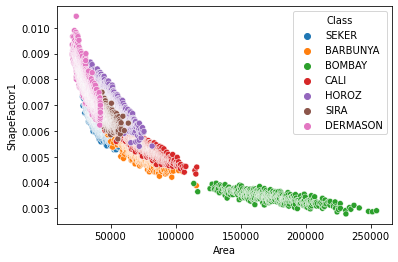

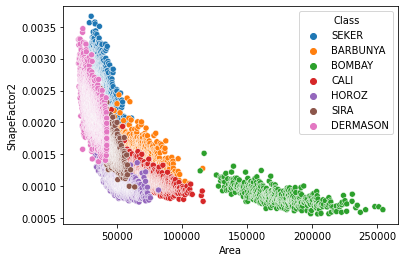

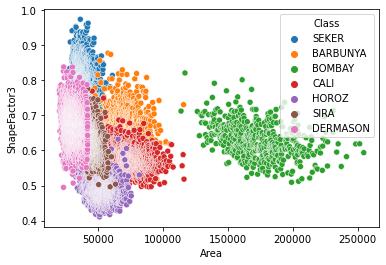

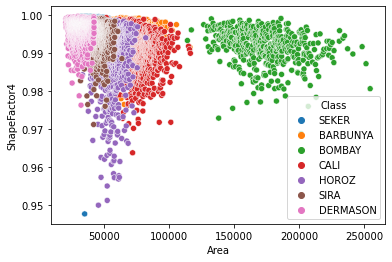

In [13]:
for column in data.columns[0:-1]:
    sns.scatterplot(data = data , x="Area" , y = column , hue = "Class")
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
data['Class'] = le.fit_transform(data['Class'])

In [17]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


# Modelleme

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [19]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score

In [20]:
y = data["Class"]
X = data.drop(["Class"] , axis=1)
x_train ,x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [21]:
gbc = GradientBoostingClassifier().fit(x_train , y_train)
y_pred = gbc.predict(x_test)
accuracy_score(y_test , y_pred)

0.9249777382012466

In [22]:
knn = KNeighborsClassifier().fit(x_train , y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test , y_pred)

0.709706144256456

In [23]:
nb = GaussianNB().fit(x_train , y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test , y_pred)

0.7620213713268033

In [24]:
rfc = RandomForestClassifier().fit(x_train , y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test , y_pred)

0.9218610863757791

In [25]:
xgb = XGBClassifier().fit(x_train , y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test , y_pred)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9249777382012466

In [26]:
lgbm = LGBMClassifier().fit(x_train , y_train)
y_pred = lgbm.predict(x_test)
accuracy_score(y_test , y_pred)

0.92520035618878

In [27]:
cbc = CatBoostClassifier().fit(x_train , y_train)
y_pred = cbc.predict(x_test)
accuracy_score(y_test , y_pred)

Learning rate set to 0.088569
0:	learn: 1.6242277	total: 194ms	remaining: 3m 13s
1:	learn: 1.3998672	total: 241ms	remaining: 2m
2:	learn: 1.2499859	total: 281ms	remaining: 1m 33s
3:	learn: 1.1132590	total: 323ms	remaining: 1m 20s
4:	learn: 1.0063218	total: 362ms	remaining: 1m 11s
5:	learn: 0.9211572	total: 405ms	remaining: 1m 7s
6:	learn: 0.8475062	total: 447ms	remaining: 1m 3s
7:	learn: 0.7825537	total: 492ms	remaining: 1m 1s
8:	learn: 0.7296418	total: 531ms	remaining: 58.4s
9:	learn: 0.6828729	total: 570ms	remaining: 56.4s
10:	learn: 0.6413303	total: 608ms	remaining: 54.7s
11:	learn: 0.6050164	total: 653ms	remaining: 53.7s
12:	learn: 0.5743140	total: 697ms	remaining: 52.9s
13:	learn: 0.5443534	total: 736ms	remaining: 51.8s
14:	learn: 0.5184773	total: 775ms	remaining: 50.9s
15:	learn: 0.4954249	total: 816ms	remaining: 50.2s
16:	learn: 0.4740062	total: 857ms	remaining: 49.6s
17:	learn: 0.4532262	total: 906ms	remaining: 49.4s
18:	learn: 0.4342327	total: 950ms	remaining: 49s
19:	learn: 0

166:	learn: 0.1627546	total: 7.09s	remaining: 35.4s
167:	learn: 0.1624542	total: 7.13s	remaining: 35.3s
168:	learn: 0.1621691	total: 7.17s	remaining: 35.3s
169:	learn: 0.1619204	total: 7.21s	remaining: 35.2s
170:	learn: 0.1615485	total: 7.25s	remaining: 35.2s
171:	learn: 0.1613627	total: 7.3s	remaining: 35.1s
172:	learn: 0.1610723	total: 7.34s	remaining: 35.1s
173:	learn: 0.1608569	total: 7.38s	remaining: 35s
174:	learn: 0.1604203	total: 7.42s	remaining: 35s
175:	learn: 0.1601640	total: 7.46s	remaining: 34.9s
176:	learn: 0.1598230	total: 7.5s	remaining: 34.9s
177:	learn: 0.1596007	total: 7.54s	remaining: 34.8s
178:	learn: 0.1592773	total: 7.58s	remaining: 34.8s
179:	learn: 0.1590621	total: 7.62s	remaining: 34.7s
180:	learn: 0.1586978	total: 7.66s	remaining: 34.7s
181:	learn: 0.1585189	total: 7.7s	remaining: 34.6s
182:	learn: 0.1582823	total: 7.74s	remaining: 34.5s
183:	learn: 0.1579973	total: 7.78s	remaining: 34.5s
184:	learn: 0.1575219	total: 7.82s	remaining: 34.5s
185:	learn: 0.15719

326:	learn: 0.1286627	total: 13.7s	remaining: 28.1s
327:	learn: 0.1285241	total: 13.7s	remaining: 28.1s
328:	learn: 0.1284028	total: 13.7s	remaining: 28s
329:	learn: 0.1282368	total: 13.8s	remaining: 28s
330:	learn: 0.1280741	total: 13.8s	remaining: 27.9s
331:	learn: 0.1279019	total: 13.9s	remaining: 27.9s
332:	learn: 0.1275986	total: 13.9s	remaining: 27.8s
333:	learn: 0.1274455	total: 13.9s	remaining: 27.8s
334:	learn: 0.1272871	total: 14s	remaining: 27.8s
335:	learn: 0.1271943	total: 14s	remaining: 27.7s
336:	learn: 0.1270508	total: 14.1s	remaining: 27.7s
337:	learn: 0.1268579	total: 14.1s	remaining: 27.6s
338:	learn: 0.1266863	total: 14.1s	remaining: 27.6s
339:	learn: 0.1264908	total: 14.2s	remaining: 27.5s
340:	learn: 0.1263824	total: 14.2s	remaining: 27.5s
341:	learn: 0.1261128	total: 14.3s	remaining: 27.4s
342:	learn: 0.1259236	total: 14.3s	remaining: 27.4s
343:	learn: 0.1257402	total: 14.4s	remaining: 27.4s
344:	learn: 0.1255930	total: 14.4s	remaining: 27.3s
345:	learn: 0.125457

488:	learn: 0.1073871	total: 20.3s	remaining: 21.3s
489:	learn: 0.1072591	total: 20.4s	remaining: 21.2s
490:	learn: 0.1071251	total: 20.4s	remaining: 21.2s
491:	learn: 0.1070381	total: 20.5s	remaining: 21.1s
492:	learn: 0.1069725	total: 20.5s	remaining: 21.1s
493:	learn: 0.1068689	total: 20.5s	remaining: 21s
494:	learn: 0.1067395	total: 20.6s	remaining: 21s
495:	learn: 0.1066321	total: 20.6s	remaining: 21s
496:	learn: 0.1065689	total: 20.7s	remaining: 20.9s
497:	learn: 0.1064829	total: 20.7s	remaining: 20.9s
498:	learn: 0.1064053	total: 20.7s	remaining: 20.8s
499:	learn: 0.1062678	total: 20.8s	remaining: 20.8s
500:	learn: 0.1061909	total: 20.8s	remaining: 20.7s
501:	learn: 0.1060868	total: 20.9s	remaining: 20.7s
502:	learn: 0.1059176	total: 20.9s	remaining: 20.7s
503:	learn: 0.1058106	total: 20.9s	remaining: 20.6s
504:	learn: 0.1057419	total: 21s	remaining: 20.6s
505:	learn: 0.1055717	total: 21s	remaining: 20.5s
506:	learn: 0.1054398	total: 21.1s	remaining: 20.5s
507:	learn: 0.1053320	

651:	learn: 0.0911249	total: 27s	remaining: 14.4s
652:	learn: 0.0910607	total: 27.1s	remaining: 14.4s
653:	learn: 0.0910090	total: 27.1s	remaining: 14.3s
654:	learn: 0.0909124	total: 27.1s	remaining: 14.3s
655:	learn: 0.0908593	total: 27.2s	remaining: 14.3s
656:	learn: 0.0907789	total: 27.2s	remaining: 14.2s
657:	learn: 0.0906935	total: 27.3s	remaining: 14.2s
658:	learn: 0.0906517	total: 27.3s	remaining: 14.1s
659:	learn: 0.0905121	total: 27.3s	remaining: 14.1s
660:	learn: 0.0903764	total: 27.4s	remaining: 14s
661:	learn: 0.0902784	total: 27.4s	remaining: 14s
662:	learn: 0.0902314	total: 27.5s	remaining: 14s
663:	learn: 0.0901482	total: 27.5s	remaining: 13.9s
664:	learn: 0.0901167	total: 27.5s	remaining: 13.9s
665:	learn: 0.0900673	total: 27.6s	remaining: 13.8s
666:	learn: 0.0899271	total: 27.6s	remaining: 13.8s
667:	learn: 0.0898085	total: 27.7s	remaining: 13.7s
668:	learn: 0.0896800	total: 27.7s	remaining: 13.7s
669:	learn: 0.0895842	total: 27.7s	remaining: 13.7s
670:	learn: 0.089509

813:	learn: 0.0776395	total: 33.7s	remaining: 7.69s
814:	learn: 0.0775777	total: 33.7s	remaining: 7.65s
815:	learn: 0.0774919	total: 33.7s	remaining: 7.61s
816:	learn: 0.0774215	total: 33.8s	remaining: 7.57s
817:	learn: 0.0773927	total: 33.8s	remaining: 7.53s
818:	learn: 0.0773298	total: 33.9s	remaining: 7.48s
819:	learn: 0.0772858	total: 33.9s	remaining: 7.44s
820:	learn: 0.0771901	total: 33.9s	remaining: 7.4s
821:	learn: 0.0771182	total: 34s	remaining: 7.36s
822:	learn: 0.0770573	total: 34s	remaining: 7.32s
823:	learn: 0.0769761	total: 34.1s	remaining: 7.28s
824:	learn: 0.0768224	total: 34.1s	remaining: 7.23s
825:	learn: 0.0767553	total: 34.1s	remaining: 7.19s
826:	learn: 0.0766925	total: 34.2s	remaining: 7.15s
827:	learn: 0.0765879	total: 34.2s	remaining: 7.11s
828:	learn: 0.0765196	total: 34.3s	remaining: 7.07s
829:	learn: 0.0764581	total: 34.3s	remaining: 7.03s
830:	learn: 0.0763725	total: 34.4s	remaining: 6.99s
831:	learn: 0.0762942	total: 34.4s	remaining: 6.95s
832:	learn: 0.076

972:	learn: 0.0676564	total: 40.2s	remaining: 1.11s
973:	learn: 0.0676025	total: 40.2s	remaining: 1.07s
974:	learn: 0.0675708	total: 40.3s	remaining: 1.03s
975:	learn: 0.0674819	total: 40.3s	remaining: 991ms
976:	learn: 0.0674251	total: 40.4s	remaining: 950ms
977:	learn: 0.0673617	total: 40.4s	remaining: 909ms
978:	learn: 0.0673094	total: 40.4s	remaining: 867ms
979:	learn: 0.0672378	total: 40.5s	remaining: 826ms
980:	learn: 0.0672096	total: 40.5s	remaining: 785ms
981:	learn: 0.0671772	total: 40.6s	remaining: 743ms
982:	learn: 0.0670698	total: 40.6s	remaining: 702ms
983:	learn: 0.0670086	total: 40.6s	remaining: 661ms
984:	learn: 0.0669822	total: 40.7s	remaining: 620ms
985:	learn: 0.0669342	total: 40.7s	remaining: 578ms
986:	learn: 0.0669100	total: 40.8s	remaining: 537ms
987:	learn: 0.0668761	total: 40.8s	remaining: 496ms
988:	learn: 0.0667822	total: 40.8s	remaining: 454ms
989:	learn: 0.0667474	total: 40.9s	remaining: 413ms
990:	learn: 0.0667009	total: 40.9s	remaining: 372ms
991:	learn: 

0.931433659839715

In [28]:
modeller = [
    gbc,
    knn,
    nb,
    rfc,
    xgb,
    lgbm,
    cbc,    
]
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk =accuracy_score(y_test , y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GradientBoostingClassifier:
Accuracy: 92.4978%
----------------------------
KNeighborsClassifier:
Accuracy: 70.9706%
----------------------------
GaussianNB:
Accuracy: 76.2021%
----------------------------
RandomForestClassifier:
Accuracy: 92.1861%
----------------------------
XGBClassifier:
Accuracy: 92.4978%
----------------------------
LGBMClassifier:
Accuracy: 92.5200%
----------------------------
CatBoostClassifier:
Accuracy: 93.1434%
